In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Sequential
from keras import regularizers


In [8]:
df = pd.read_csv("/Users/balamuralibalu/PythonProjects/AI_Music_detection_project/CLAP_detection/Out/df_merged.csv")

In [9]:
def to_numerical(row):
    if row["source"] == "Suno":
        return 1
    else:
        return 0

df["target"] = df.apply(to_numerical, axis=1)

In [10]:
df.columns
df_ml = df.copy(deep=True)
df_ml = df_ml.drop(columns=['filename', 'source'])
df_ml.columns

Index(['score_synthetic_music_track', 'score_music_created_by_a_musician',
       'score_music_with_audio_glitches', 'score_music_with_smooth_production',
       'score_ai-generated_music', 'score_human-performed_music',
       'score_harmonic_content', 'score_noise', 'score_digital',
       'score_natural,_live', 'target'],
      dtype='object')

In [11]:
X = df_ml.drop(columns=["target"]).to_numpy()
y = df_ml["target"].to_numpy()

X_temp,X_test,y_temp,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_temp,y_temp, test_size = 0.3, random_state=42)

print(X.shape, len(y))
print(X_train.shape, len(y_train))
print(X_val.shape, len(y_val))
print(X_test.shape, len(y_test))

(46399, 10) 46399
(25983, 10) 25983
(11136, 10) 11136
(9280, 10) 9280


In [52]:
input_dim = X_train.shape[1]  # number of columns/features
#model creation
model = Sequential([
            Input(shape = (input_dim,)),
            #Dense(512,activation = 'relu',kernel_regularizer=regularizers.l2(0.001)),
            #Dense(128,activation = 'relu',kernel_regularizer=regularizers.l2(0.001)),
            Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
            Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
            Dense(1, activation = 'sigmoid')
]) 

In [53]:
#compile
model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy','Precision', 'Recall']
)


In [54]:
history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val,y_val),
        epochs=30
)


Epoch 1/30
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.8187 - Recall: 0.8546 - accuracy: 0.8457 - loss: 0.5884 - val_Precision: 0.8799 - val_Recall: 0.8517 - val_accuracy: 0.8772 - val_loss: 0.4380
Epoch 2/30
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8653 - Recall: 0.8864 - accuracy: 0.8841 - loss: 0.4018 - val_Precision: 0.8584 - val_Recall: 0.9052 - val_accuracy: 0.8867 - val_loss: 0.3738
Epoch 3/30
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8741 - Recall: 0.8919 - accuracy: 0.8910 - loss: 0.3598 - val_Precision: 0.8841 - val_Recall: 0.8789 - val_accuracy: 0.8903 - val_loss: 0.3461
Epoch 4/30
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8766 - Recall: 0.8965 - accuracy: 0.8941 - loss: 0.3390 - val_Precision: 0.8329 - val_Recall: 0.9445 - val_accuracy: 0.8862 - val_loss: 0.3470
Epoch 5/30
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8830 - Recall: 0.8982 - accuracy: 0.8982 - loss: 0.3237 - val_Precision: 0.9045 - val_Recall:

In [55]:
test_loss, test_acc,test_precision,test_recall = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc},Test precision: {test_precision},Test recall: {test_recall} ")
# test_loss = model.evaluate(X_test, y_test)
# print(f"Test loss: {test_loss} ")

290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.8974 - Recall: 0.8957 - accuracy: 0.9050 - loss: 0.2659  
Test loss: 0.2658950388431549, Test accuracy: 0.9049568772315979,Test precision: 0.8974178433418274,Test recall: 0.8957356810569763 


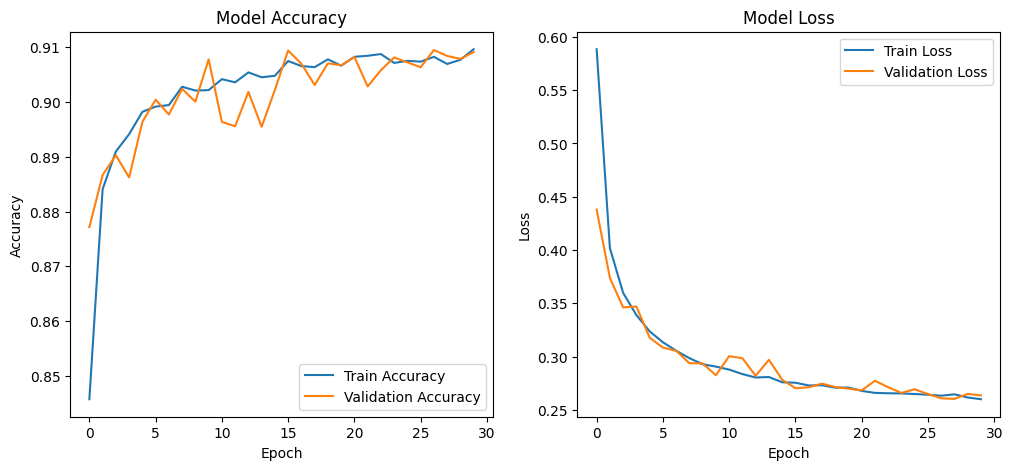

In [56]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
